## To classify whether a user of a particular age and with a particular salary will buy their given product or not using SVM.

In [1]:
%config IPCompleter.greedy=True

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [3]:
dataSet='Dataset/SocialNetworkAds.csv'

In [4]:
df=pd.read_csv(dataSet,dtype='float64')

In [5]:
df.head()

,Age,EstimatedSalary,Purchased
0,19.0,19000.0,0.0
1,35.0,20000.0,0.0
2,26.0,43000.0,0.0
3,27.0,57000.0,0.0
4,19.0,76000.0,0.0


In [6]:
df.tail()

,Age,EstimatedSalary,Purchased
395,46.0,41000.0,1.0
396,51.0,23000.0,1.0
397,50.0,20000.0,1.0
398,36.0,33000.0,0.0
399,49.0,36000.0,1.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              400 non-null    float64
 1   EstimatedSalary  400 non-null    float64
 2   Purchased        400 non-null    float64
dtypes: float64(3)
memory usage: 9.5 KB


In [8]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [9]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
scaler=StandardScaler()

In [11]:
x=np.array(df.drop(['Purchased'],axis=1))

In [12]:
y=np.array(df.Purchased).reshape(-1,1)

In [13]:
x=scaler.fit_transform(x)
y=scaler.fit_transform(y)

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=220)

In [15]:
print(f"{len(x_train)} ,{len(y_train)}")

320 ,320


In [16]:
print(f"{len(x_test)} ,{len(y_test)}")

80 ,80


In [17]:
model=SVR(kernel='rbf')

In [18]:
model.fit(x_train,y_train)

c:\users\dhruv\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [19]:
y_pred=model.predict(x_test)

In [20]:
model.score(x_train,y_train)

0.639077951505305

In [21]:
r2_score(y_test,y_pred)

0.9313307908073951

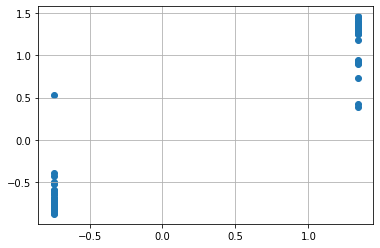

In [22]:
plt.scatter(y_test,y_pred)
plt.grid()